<a href="https://colab.research.google.com/github/DingLi23/s2search/blob/pipelining/pipelining/exp5/exp5_cslg_plotting_shap.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Experiment Description

Obtain shap values.

### Initialization

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np, sys, os
in_colab = 'google.colab' in sys.modules
# fetching code and data(if you are using colab
if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')
    %cd s2search/pipelining/exp5/

pic_dir = os.path.join('.', 'plot')
if not os.path.exists(pic_dir):
    os.mkdir(pic_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading data

Got sample data: cslg


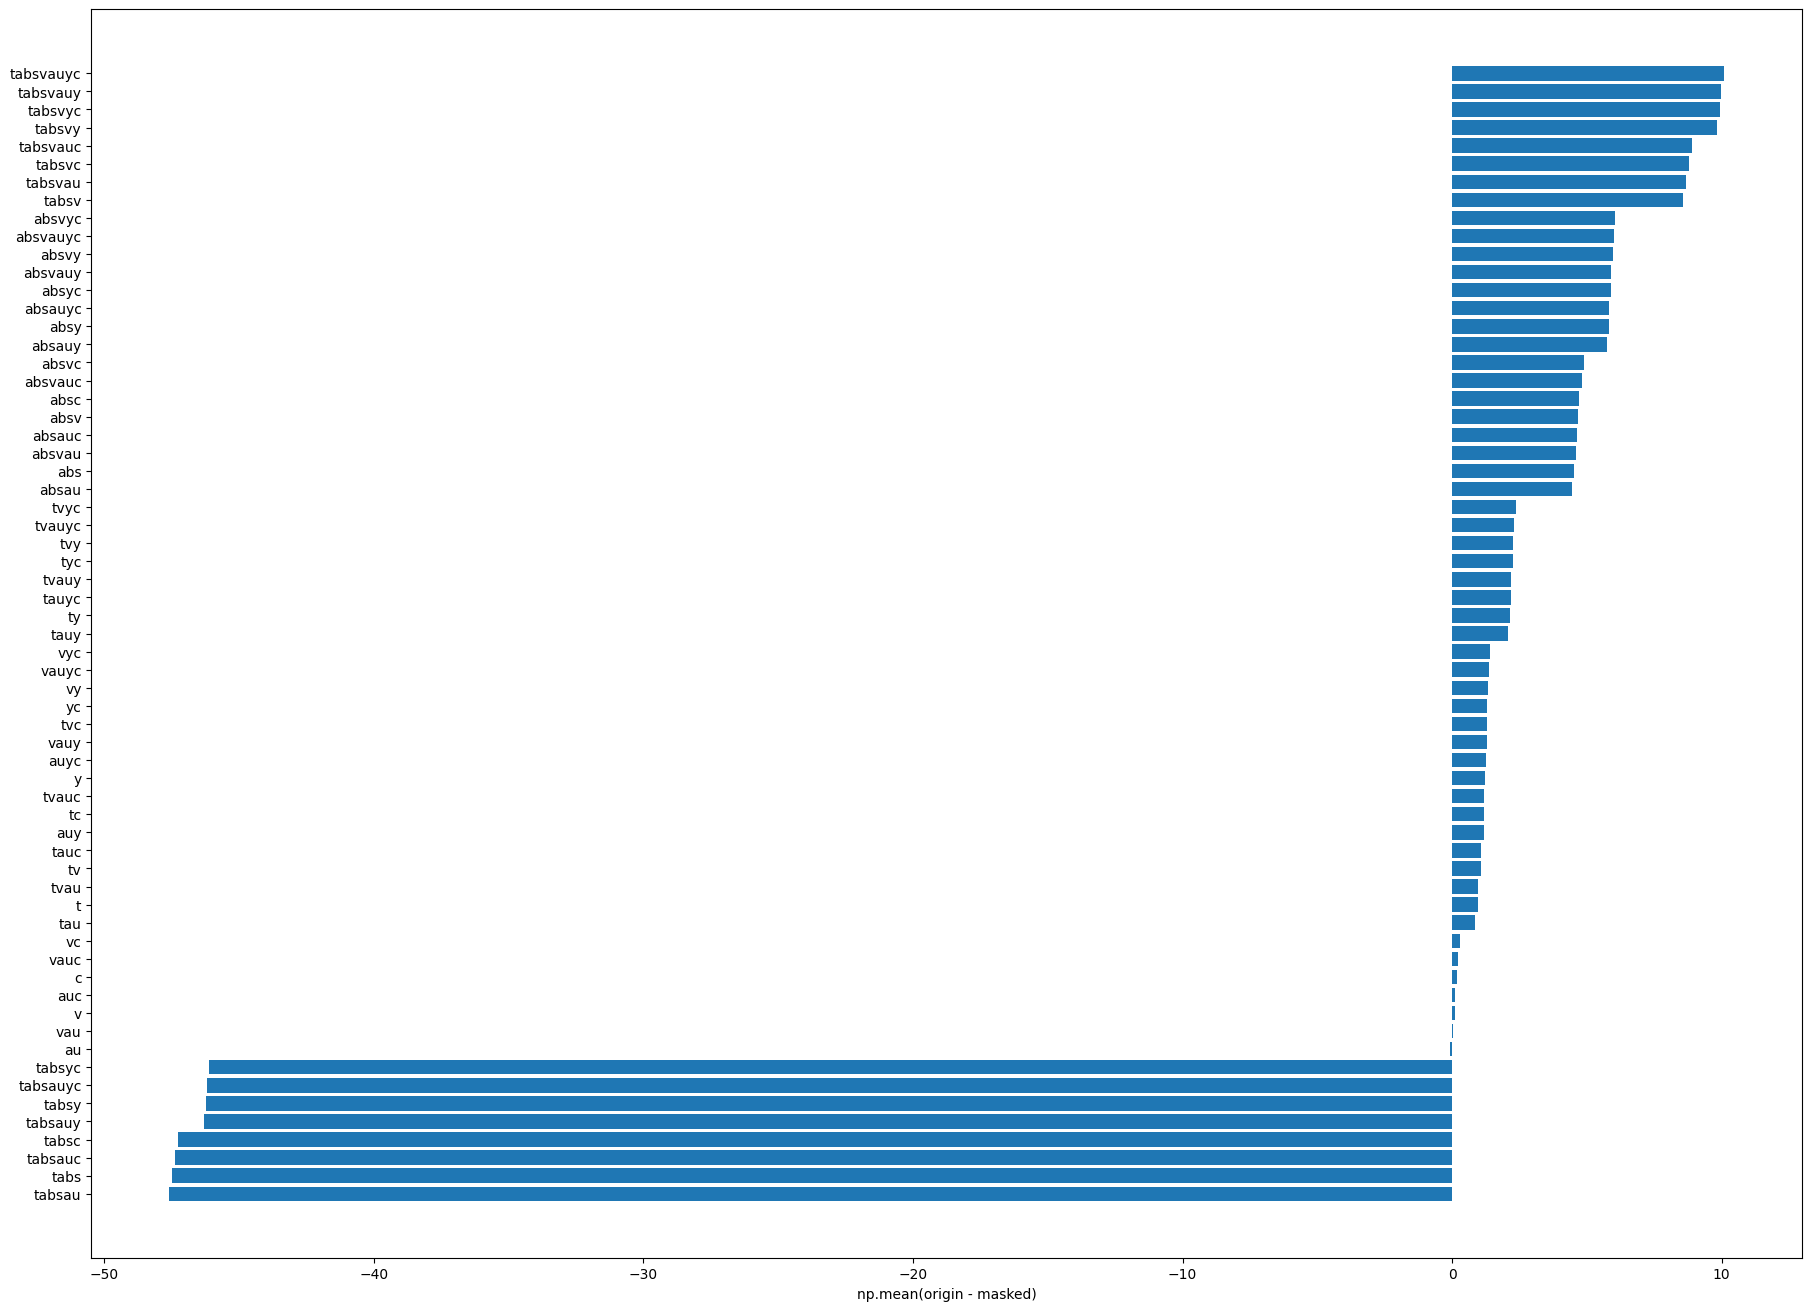

{'key': 'tabsvauyc', 'value': 10.081012586670656}
{'key': 'tabsvauy', 'value': 9.978318873578882}
{'key': 'tabsvyc', 'value': 9.94265733089169}
{'key': 'tabsvy', 'value': 9.842283056711318}
{'key': 'tabsvauc', 'value': 8.901063170459798}
{'key': 'tabsvc', 'value': 8.775383007848747}
{'key': 'tabsvau', 'value': 8.673334264859822}
{'key': 'tabsv', 'value': 8.55043716738413}
{'key': 'absvyc', 'value': 6.051237163581981}
{'key': 'absvauyc', 'value': 5.987747481413697}
{'key': 'absvy', 'value': 5.967887923553317}
{'key': 'absvauy', 'value': 5.902538114775959}
{'key': 'absyc', 'value': 5.887151448007811}
{'key': 'absauyc', 'value': 5.823502413907754}
{'key': 'absy', 'value': 5.803739411606641}
{'key': 'absauy', 'value': 5.738230250897508}
{'key': 'absvc', 'value': 4.874523514874489}
{'key': 'absvauc', 'value': 4.802059965301497}
{'key': 'absc', 'value': 4.711113152498798}
{'key': 'absv', 'value': 4.674702354587479}
{'key': 'absauc', 'value': 4.638399124621333}
{'key': 'absvau', 'value': 4.59

In [4]:
sys.path.insert(1, '../../')
import numpy as np, sys, os
from getting_data import get
from feature_masking import masking_options

sample_data_and_config_arr = get('exp5', 'cslg')

shapley_need = []
import matplotlib.pyplot as plt

for sample_data_and_config in sample_data_and_config_arr:
    y_values = []
    sample_origin_npy = sample_data_and_config['origin']
    idx = 0
    for array in sample_data_and_config['feature_stack']:

        # define your y axis value here
        y_value = np.absolute((sample_origin_npy - array) / sample_origin_npy)
        # y_value = sample_origin_npy - array
        y_values.append(y_value)
        
        shapley_need.append({
            'key': sample_data_and_config['masking_option_keys'][idx],
            'value': np.mean(sample_origin_npy - array)
        })
        
        idx += 1

    y_values = np.array(y_values)
    sample_data_and_config['y_values'] = y_values

shapley_need = sorted(shapley_need, key=lambda x: -x['value'])

keys = []
values = []
for s in shapley_need:
    keys.append(s['key'])
    values.append(s['value'])

y_pos = np.arange(len(keys))
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(18, 13), constrained_layout=True)

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos, labels=keys)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('np.mean(origin - masked)')

plt.show()

for kv in shapley_need:
    print(kv)